In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from scipy.stats import pearsonr

%matplotlib inline

# Least squares curve fitting

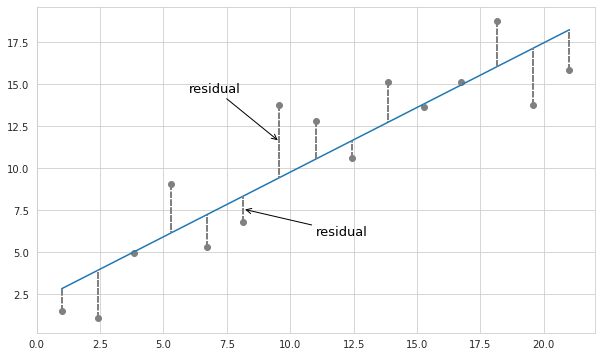

In [4]:
np.random.seed(42)
x = np.linspace(1, 21, 15)
y = np.linspace(0, 21, 15) + np.random.normal(0, 3, 15)

slope, intercept, r_value, p_value, std_err = linregress(x,y) # parameters from least squares computed linear regression

with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x, y, color='grey') # actual data
y_computed = np.array([intercept+i*slope for i in x])
residuals = y_computed - y
ax.plot(x, y_computed) # fitted line
for r in list(zip(x, y, y_computed)):
    ax.plot([x, x], [y, y_computed], linestyle='--', color='gray')
ax.annotate('residual', xy=(x[6],(y[6]+y_computed[6])/2), xytext=(6, 14.5), 
            arrowprops=dict(arrowstyle="->"), fontsize=13)
ax.annotate('residual', xy=(x[5],(y[5]+y_computed[5])/2), xytext=(11, 6), 
            arrowprops=dict(arrowstyle="->"), fontsize=13)
plt.savefig('../../assets/images/regression/residuals_demo.png', bbox_inches='tight');

# Heteroscedasticity

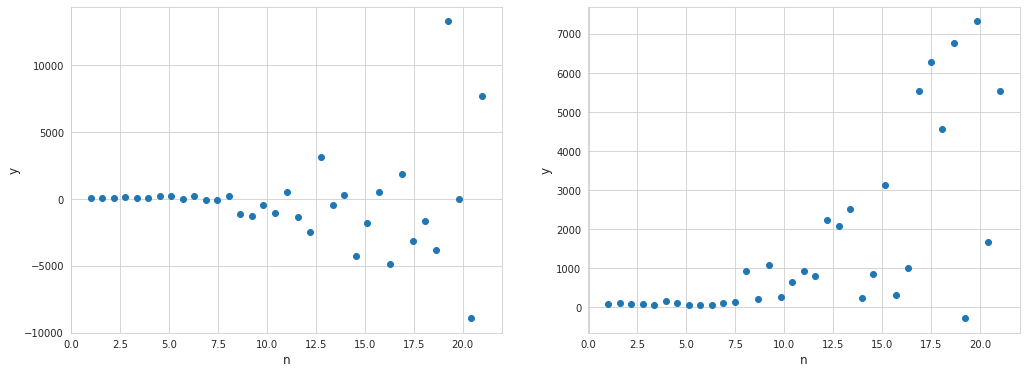

In [80]:
x = np.linspace(1, 21, 35)
np.random.seed(42)
y1 = np.random.normal(100, x**3, 35)
y2 = abs(np.random.normal(100, x**3, 35)) + np.random.normal(0, x**2.5, 35)

with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(1, 2, figsize=(17,6))
ax[0].scatter(x, y1)
ax[1].scatter(x, y2)
for ax in ax:
    ax.set_xlabel('n', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
#plt.savefig('../../assets/images/regression/heteroscedasticity_demo.png', bbox_inches='tight');

# Correlation

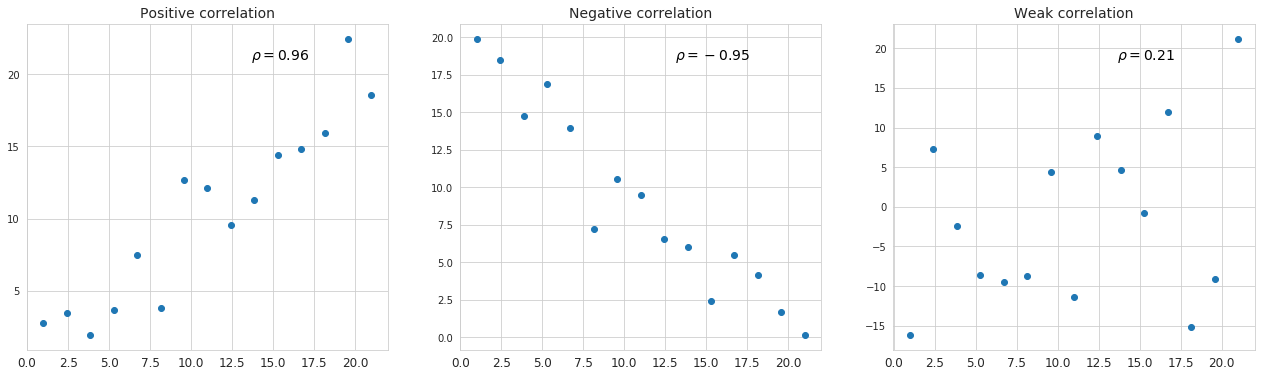

In [3]:
x = np.linspace(1, 21, 15)
def get_data(relation=1):
    if relation == 1: # positive correlation coefficient
        y = np.linspace(0, 21, 15) + np.random.normal(0, 2, 15)
    elif relation == -1:  # negative correlation coefficient
        y = np.linspace(21, 0, 15) + np.random.normal(0, 2, 15)
    elif relation == 0:  # neutral correlation coefficient
        y = np.random.normal(0, 11, 15)
    else: 
        return
    corr, _ = pearsonr(x, y)
    return [y, round(corr, 2)]

with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(1, 3, figsize=(22,6))
    
ax[0].scatter(x, get_data(relation=1)[0])
ax[0].annotate(f'$\\rho={get_data(relation=1)[1]}$', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=14,
        ha='center', va='center')
ax[0].set_title('Positive correlation', fontsize=14)

ax[1].scatter(x, get_data(relation=-1)[0])
ax[1].annotate(f'$\\rho={get_data(relation=-1)[1]}$', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=14,
        ha='center', va='center')
ax[1].set_title('Negative correlation', fontsize=14)

ax[2].scatter(x, get_data(relation=0)[0])
ax[2].annotate(f'$\\rho={get_data(relation=0)[1]}$', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=14,
        ha='center', va='center')
ax[2].set_title('Weak correlation', fontsize=14)

for ax in ax:
    ax.xaxis.set_tick_params(labelsize=12)
#plt.savefig('../../assets/images/regression/correlation_demo.png', bbox_inches='tight');